<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0.-Imports:-Basics-and-tensorflow" data-toc-modified-id="0.-Imports:-Basics-and-tensorflow-0">0. Imports: Basics and tensorflow</a></span></li><li><span><a href="#1.-Import-data" data-toc-modified-id="1.-Import-data-1">1. Import data</a></span><ul class="toc-item"><li><span><a href="#1.1-Labels-preprocessing-(One-hot-encoding-for-classification)" data-toc-modified-id="1.1-Labels-preprocessing-(One-hot-encoding-for-classification)-1.1">1.1 Labels preprocessing (One hot encoding for classification)</a></span></li></ul></li><li><span><a href="#2.-Introduction-to-Tensorflow-and-Keras:-Image-recognition-with-a-fully-connected-neural-network" data-toc-modified-id="2.-Introduction-to-Tensorflow-and-Keras:-Image-recognition-with-a-fully-connected-neural-network-2">2. Introduction to Tensorflow and Keras: Image recognition with a fully connected neural network</a></span><ul class="toc-item"><li><span><a href="#2.1-Network-definition-using-tensorflow/keras" data-toc-modified-id="2.1-Network-definition-using-tensorflow/keras-2.1">2.1 Network definition using tensorflow/keras</a></span></li><li><span><a href="#2.2-Image-preprocessing-(flatten-images-for-dense-networks)" data-toc-modified-id="2.2-Image-preprocessing-(flatten-images-for-dense-networks)-2.2">2.2 Image preprocessing (flatten images for dense networks)</a></span></li><li><span><a href="#2.3-One-epoch-training-with-single-steps" data-toc-modified-id="2.3-One-epoch-training-with-single-steps-2.3">2.3 One epoch training with single steps</a></span></li><li><span><a href="#2.4-Train-for-several-epochs" data-toc-modified-id="2.4-Train-for-several-epochs-2.4">2.4 Train for several epochs</a></span></li></ul></li><li><span><a href="#3.-Image-recognition-with-a-CNN" data-toc-modified-id="3.-Image-recognition-with-a-CNN-3">3. Image recognition with a CNN</a></span></li><li><span><a href="#4.-Image-Denoiser-(pseudo-unsupervised-learning)" data-toc-modified-id="4.-Image-Denoiser-(pseudo-unsupervised-learning)-4">4. Image Denoiser (pseudo-unsupervised learning)</a></span></li><li><span><a href="#5.-Autoencoder-for-dimension-reduction-(unsupervised-training)" data-toc-modified-id="5.-Autoencoder-for-dimension-reduction-(unsupervised-training)-5">5. Autoencoder for dimension reduction (unsupervised training)</a></span></li><li><span><a href="#6.-[Just-read]-Autoencoders-for-random-face-generator" data-toc-modified-id="6.-[Just-read]-Autoencoders-for-random-face-generator-6">6. [Just read] Autoencoders for random face generator</a></span></li></ul></div>

<div style="text-align: right"><sub>This notebook is distributed under the <a href="https://creativecommons.org/licenses/by-sa/4.0/" target="_blank">Attribution-ShareAlike 4.0 International (CC BY-SA 4.0) license</a>.</sub></div>
<h1>Hands on Machine Learning  <span style="font-size:12px;"><i>by <a href="https://webgrec.ub.edu/webpages/000004/cat/dmaluenda.ub.edu.html" target="_blank">David Maluenda</a></i></span></h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://atenea.upc.edu/course/view.php?id=95161" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/upc_logo_49px.png" width="130"/>
    </a>
  </td>
  <td>
  </td>
  <td>   <!-- gColab -->
    <a href="https://colab.research.google.com/github/dmaluenda/hands_on_machine_learning/blob/master/03_CNN_Autoencoder.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/colab_logo_32px.png" />
      Run in Google Colab
    </a>
  </td>
  <td>   <!-- github -->
    <a href="https://github.com/dmaluenda/hands_on_machine_learning/blob/master/03_CNN_Autoencoder.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/github_logo_32px.png" />
      View source on GitHub
    </a>
  </td>
  <td>   <!-- download -->
    <a href="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/03_CNN_Autoencoder.ipynb"  target="_blank"
          download="03_CNN_Autoencoder">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/download_logo_32px.png" />
      Download notebook
      </a>
  </td>
</table>

# $\text{III}$. Convolutional Neural Networks and Autoencoders (using Keras)

Hands on "Machine Learning on Classical and Quantum data" course of
[Master in Photonics - PHOTONICS BCN](https://photonics.masters.upc.edu/en/general-information)
[[UPC](https://photonics.masters.upc.edu/en) +
[UB](https://www.ub.edu/web/ub/en/estudis/oferta_formativa/master_universitari/fitxa/P/M0D0H/index.html?) +
[UAB](https://www.uab.cat/en/uab-official-masters-degrees-study-guides/) +
[ICFO](https://www.icfo.eu/lang/studies/master-studies)].

**Tutorial 3**

This notebook shows how to:
- manage image dataset to be able to fit dense or convolutional models
- create _one hot encoded_ labels
- split datasets for training, validation and testing neural networks
- implement neural networks using the Tensorflow/Keras module
- recognize/classify images with dense nets (supervised learning)
- recognize/classify images with convolutional nets (supervised learning)
- implement image denoising using autoencoders (pseudo-unsupervised learning)
- quick review of: VAE (unsupervised learning)
- implement callbacks, like an automatic early stopper

**References**:

[1] [Machine Learning for Physicists](https://machine-learning-for-physicists.org/) by Florian Marquardt.<br>
[2] [Keras](https://keras.io/getting_started/): a deep learning API written in Python.<br>
[3] [Tensorflow](https://www.tensorflow.org/api_docs/python/tf): an open source machine learning platform.<br>
[4] [Using neural nets to recognize handwritten digits](http://neuralnetworksanddeeplearning.com/chap1.html).<br>
[5] [pix2pix](https://www.tensorflow.org/tutorials/generative/pix2pix): Image-to-image translation with a conditional GAN.<br>
[6] Dimension reduction in [Towards data science](https://ekamperi.github.io/machine%20learning/2021/01/21/encoder-decoder-model.html) <br>
[7] VAE example on [Towards data science](https://towardsdatascience.com/variational-autoencoders-as-generative-models-with-keras-e0c79415a7eb).<br>
[8] https://github.com/kartikgill/Autoencoders.<br>
[9] https://github.com/dhanushkamath/VariationalAutoencoder. <br>


## 0. Imports: Basics and tensorflow

The module tensorflow have to be installed (version tested 2.18).

`!pip install tensorflow==2.18`

Version of NumPy tested: 2.0

`!pip install numpy==2.0`

In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist  # dataset of handwritten numbers

import numpy as np

import matplotlib.pyplot as plt  # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300  # highres display

# for updating display 
# (very simple animation)
from IPython.display import clear_output
from time import time, sleep

## 1. Import data

In this tutorial, we will use the MNIST dataset. It is a dataset with many images depicting handwritten numbers. Additionally, it provides their corresponding numeric value (label).

We will do three exercises with this dataset:

1. detect the handwritten numbers (classification)
1. denoise images (pseudo-autoencoder)
1. dimensional reduction (autoencoder)

One key point on using data for training neural networks is to have three independent subsets.

 - Training dataset: It is used for training. The biggest subset, typically around 70%.
 - Validation dataset: It is used to monitor the training, but not used for backpropagation. Typically around 15%.
 - Test dataset: It is used only after the training in order to check the performance of the neural network. Typically around 15%.
 
The function below returns a whole dataset of 70k handwritten numbers and their corresponding number. It is split in this three independent sub-datasets with 50k for training, 10k for validation, and 10k for test.

In [2]:
"""
mnist_loader
~~~~~~~~~~~~

taken from Nielsen's online book:
http://neuralnetworksanddeeplearning.com/chap1.html


A library to load the MNIST image data.  For details of the data
structures that are returned, see the doc strings for ``load_data``
and ``load_data_wrapper``.  In practice, ``load_data_wrapper`` is the
function usually called by our neural network code.
"""

def load_data():
    """ Return three datasets (train/val/test), each one being a tuple of
         - numpy array of setSize x 28 x 28 x 1: Set of images
         - numpy array of setSize x 1: Set of ground truth values
        setSize is 50000 for the train set and 10000 for the val and test sets.
    """
    
    # get raw data: a tuple of two entries (train/test) each one 
    #  being also a tuple of two entries, one for a set of 28x28 images
    #  and the other being a set of their corresponding integers
    (train_val_X, train_val_y), (test_X, test_y) = mnist.load_data()

    # to convert values from 0 to 255 into range 0. to 1.
    train_val_X = train_val_X.astype('float32') / 255.
    test_X = test_X.astype('float32') / 255.
    
    # Conv2D need 3D images (row, columns, chanels), so adding the chanel dimension
    train_val_X = np.reshape(train_val_X, (len(train_val_X), 28, 28, 1)) 
    test_X = np.reshape(test_X, (len(test_X), 28, 28, 1))
    
    train_X = train_val_X[:-10000]
    val_X = train_val_X[-10000:]

    train_y = train_val_y[:-10000]
    val_y = train_val_y[-10000:]
    
    return (train_X, train_y), (val_X, val_y), (test_X, test_y)

(train_x, train_y), (val_x, val_y), (test_x, test_y) = load_data()

Run the cell below to check a handwritten number. Run it several times to see check different samples.

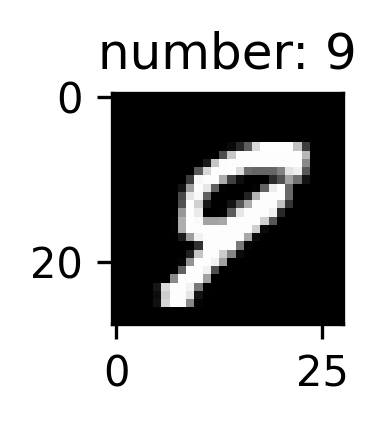

train_x.shape=(50000, 28, 28, 1)
train_y.shape=(50000,)
val_x.shape=(10000, 28, 28, 1)
val_y.shape=(10000,)
test_x.shape=(10000, 28, 28, 1)
test_y.shape=(10000,)


In [18]:
idx = np.random.randint(0,50000)
plt.figure(figsize=(1,1))
plt.imshow(train_x[idx,:,:], cmap='gray')
plt.title(f"number: {train_y[idx]}");
plt.show()

print(f"{train_x.shape=}")
print(f"{train_y.shape=}")

print(f"{val_x.shape=}")
print(f"{val_y.shape=}")

print(f"{test_x.shape=}")
print(f"{test_y.shape=}")

Check the datasets shape!

### 1.1 Labels preprocessing (One hot encoding for classification)

The best strategy for categorical classification (classify input items into certain categories, where every item belong only in one of that categories) is to have one dedicated output neuron for each possible category. In this way, the assigned category for a given input will correspond to the most activated (hottest) output neuron. This is called one hot encoding.

Check [<u>this</u>](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) for more information on one hot encoding.

Therefore, the first step is to prepare the dataset in this way.

The MNIST dataset contains pairs of $x$ images and $y$ labels. Labels are integers corresponding to the truly handwritten value. 

Write a function which take a set of integers values and returns a set of _one hot encoded_ labels. This is, they should be vectors of 10 components where all them are zero, except for the corresponding true handwritten number.

For example, a $3$ should be `[0 0 0 1 0 0 0 0 0 0 0]` and a $7\rightarrow$ `[0 0 0 0 0 0 0 1 0 0]` and so on.

Then, take the three imported raw datasets and create their corresponding $y$ one hot encoded labels.

## 2. Introduction to Tensorflow and Keras: Image recognition with a fully connected neural network

Let's start with a fully connected network (also known as dense networks or perceptron).
They are not convolutional networks, but let's start with the simplest case, just to introduce tensorflow and keras.

### 2.1 Network definition using tensorflow/keras

Let's define a dense network with one hidden layer containing about 30 neurons.

Check [`tensorflow.keras.Sequencial`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) class and its methods, e.g. [`add()`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#add), to create a neural network model.

The first layer have to be a [`tensorflow.keras.layers.Input`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Input). How many neurons should it have?

Check also [`tensorflow.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) to add fully connected layers.
This hidden layer may contain any common activation function (relu, sigmoid, etc) try different activation function for this hidden layer, and check the performance of the model.

How many output neurons should the last layer have? 
For categorical classification, the output layer should deal with a [softmax activation function](https://gombru.github.io/2018/05/23/cross_entropy_loss/). This activation function perfectly matches with the hot encoding label you prepared.

Check the method [`Sequential.compile()`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compile) to configure the model for training, by assigning a loss function, and an optimizer (optionally, also some metrics).

 - The loss function is to compute the backpropagation. For the one hot encoding classification, the most sensitive loss function is the categorical cross entropy (check the link on softmax function above for more information).
 - The most used optimizer is the Adam, an adaptive learning rate based on the momentum statistics. Check [`tensorflow.keras.optimizers.adam`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) for more information.
 - The metrics are also evaluated over the training and the validation datasets, and they are stored in the history to show the progress of the training. This is just to monitor the training progress (not to train), then it is very optional argument.

Use the `Sequential.summary()` method of your model to check the created model.

Check the 'Output shape' column. Do these numbers make sense? What is for that `None` in the first dimension?

Check also the number of trainable parameters.

### 2.2 Image preprocessing (flatten images for dense networks)

The input of fully connected neural networks (dense networks) are several neurons, corresponding to a vector (1D). However, we have images as input data (2D). So, we have to flatten that images. So, take the images from the three raw datasets and flatten them.

In [20]:
train_x_flat = np.reshape(train_x, (50000, 28*28, 1))

Use the method [`Squential.predict_on_batch()`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#predict_on_batch) over the flattened `test` images to get an initial prediction. Check the shape of the predicted result.

The function below shows a handwritten image, where the title contains the predicted and the true values, based on their one hot encoding vector. It takes a **flattened image**, its ground truth one-hot label, and a predicted one-hot vector as arguments. Also, prints the predicted vector of probabilities, under the title.

Call this function for a randomly picked input-ouput pair on the test dataset and its initial prediction made by the model.

In [21]:
def show_prediction(input_img, true_hot_lab, pred_hot_lab):

    img = input_img.reshape(28,28) if len(input_img.shape)==2 else input_img
    ture_lab = np.argmax(true_hot_lab)
    pred_lab = np.argmax(pred_hot_lab)
    
    plt.figure(figsize=(1,1))
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {ture_lab} ; Pred: {pred_lab}")
    plt.axis('off')
    red_vec = ', '.join([f"{p:.2f}" for p in pred_hot_lab])
    plt.text(0.5,1.02,"Prob. = "+red_vec, fontsize=3, ha='center', transform=plt.gca().transAxes)

TypeError: 'numpy.uint8' object is not iterable

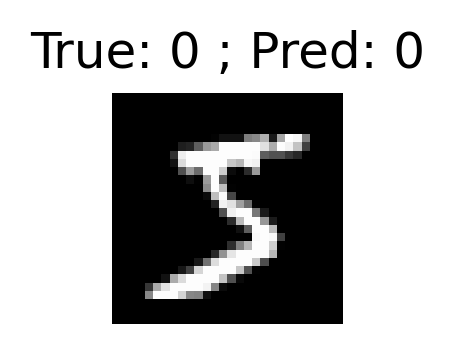

In [22]:
show_prediction(train_x_flat[0], train_y[0], train_y[0])

### 2.3 One epoch training with single steps

Train one epoch (the whole training dataset) on batches of 1000 items by using the [`train_on_batch()`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#train_on_batch) method of your model.

Remember, one epoch is considered when the whole training dataset is used. Where, one step is one backpropagation made over one batch of data.
Therefore, `steps * batchsize = training_dataset_size`.

The `train_on_batch()` returns the cost before that certain training step. Store all that costs over all the iterations and plot them at the end.

After the training, it's time to make a new prediction over the test dataset.

To check the accuracy of the prediction, call the function below.

This function:
 - compares the predicted handwritten values with the ground truth
 - computes the ratio of good predictions over the total.
 - shows five wrong predicted images using the function done in section 2.2.

In [ ]:
def show_accuracy(flat_imgs, true_hot, pred_hot):

    pred_lab = [np.argmax(hot_lab) for hot_lab in pred_hot]
    true_lab = [np.argmax(hot_lab) for hot_lab in true_hot]
    
    well = np.array([true==pred for (true, pred) in zip(true_lab, pred_lab)])
    ratio = well.sum()/well.shape[0]
    
    print(f" --> Total test Accuracy: {ratio*100:.2f}%")

    wrong_idx = np.where(well==False)[0]

    for idx in np.random.choice(wrong_idx, 5):
        show_prediction(flat_imgs[idx], true_hot[idx], pred_hot[idx])

### 2.4 Train for several epochs

To refine the training, you can re-train the model several epochs more, let's say 15 more. Check the [`Sequential.fit()`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit) method, where you can set the batchsize and the number of epochs to train as arguments. Also, check the `validation_data` argument to be able to provide the validation dataset. This method, returns a history. Store that history to check it after training.

Also, measure the elapsed time in order to compare it with the convolutional network, in a while.

Check every printed line. What are the _xxxx/xxxx_ numbers in front of the progress bar? See how `loss` and `val_loss` progress over the epochs.

Which type of variable `history` is? Check also `history.history`.

`history.history` contains the losses' evolution, for both the training and the validation datasets. Plot that curves.

What happen if validation loss/accuracy is saturated while the training loss/accuracy is getting better? Is that situation good?

Check again the accuracy of the model over the test dataset. Has it increase after training with more epochs? and training it with more and more epochs?

## 3. Image recognition with a CNN

Let's do the same with a Convolutional Neural Network.

![https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg](https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

<hr>

![https://docs.ecognition.com/Resources/Images/ECogUsr/UG_CNN_scheme.png](https://docs.ecognition.com/Resources/Images/ECogUsr/UG_CNN_scheme.png)

Define a convolutional neural network of three bottlenecks (`CNN2d+MaxPooling`). Use again a `Sequential()` model and use `tf.keras.layers.Conv2D` and `tf.keras.layers.MaxPool2D` layers.

The idea is to reduce the 2D size to half on every convolutional step (i.e. `pool_size=2`), while increasing the features mapping. Then, set an increasing the filters' parameter of Conv2D layers, e.g. $4\rightarrow8\rightarrow16$.

Convolutional layers deals with 2D data. However, we want a 1D output of 10 neurons (one hot encoding vector). So use the `tf.keras.layers.Flatten` layer and add a final `Dense` layer (how many neurons should this last layer have?). Remember, this last layer should have the softmax activation function, while the convolutional could be (relu, sigmoid...).

Plot the summary of the model. Check how many *trainable parameters* it has, and compare it with the fully connected network done before.

Use the `fit` method to train the model with 10 epochs. Check the elapsed time and compare it with the fully connected. Also store the history and plot the progress. Try with a different `batch_size` (100 or 5000), and check the elapsed time per epoch.

Check the accuracy of predictions over the test dataset and compare it with the dense model. Comment the performance in comparation of Dense model.

## 4. Image Denoiser (pseudo-unsupervised learning)

Let's try to remove noise from noisy images.

An autoencoder is a model made of two parts: encoder + decoder, having a bottle neck in the middle (a flatten vector typically called code or embedding).

Usually, autoencoders are fed with the same image $x$ in both, the input and the output. However, we can slightly modify this by setting an $x$ noisy image for the input and an $x'$ clean image for the output. Then, the model should learn to remove noise of noisy images.

![https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Autoencoder_structure.png/350px-Autoencoder_structure.png](https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Autoencoder_structure.png/350px-Autoencoder_structure.png)

First of all, we need to add some noise to images. Then we can use that as the noisy input, while the original will be the clean output.

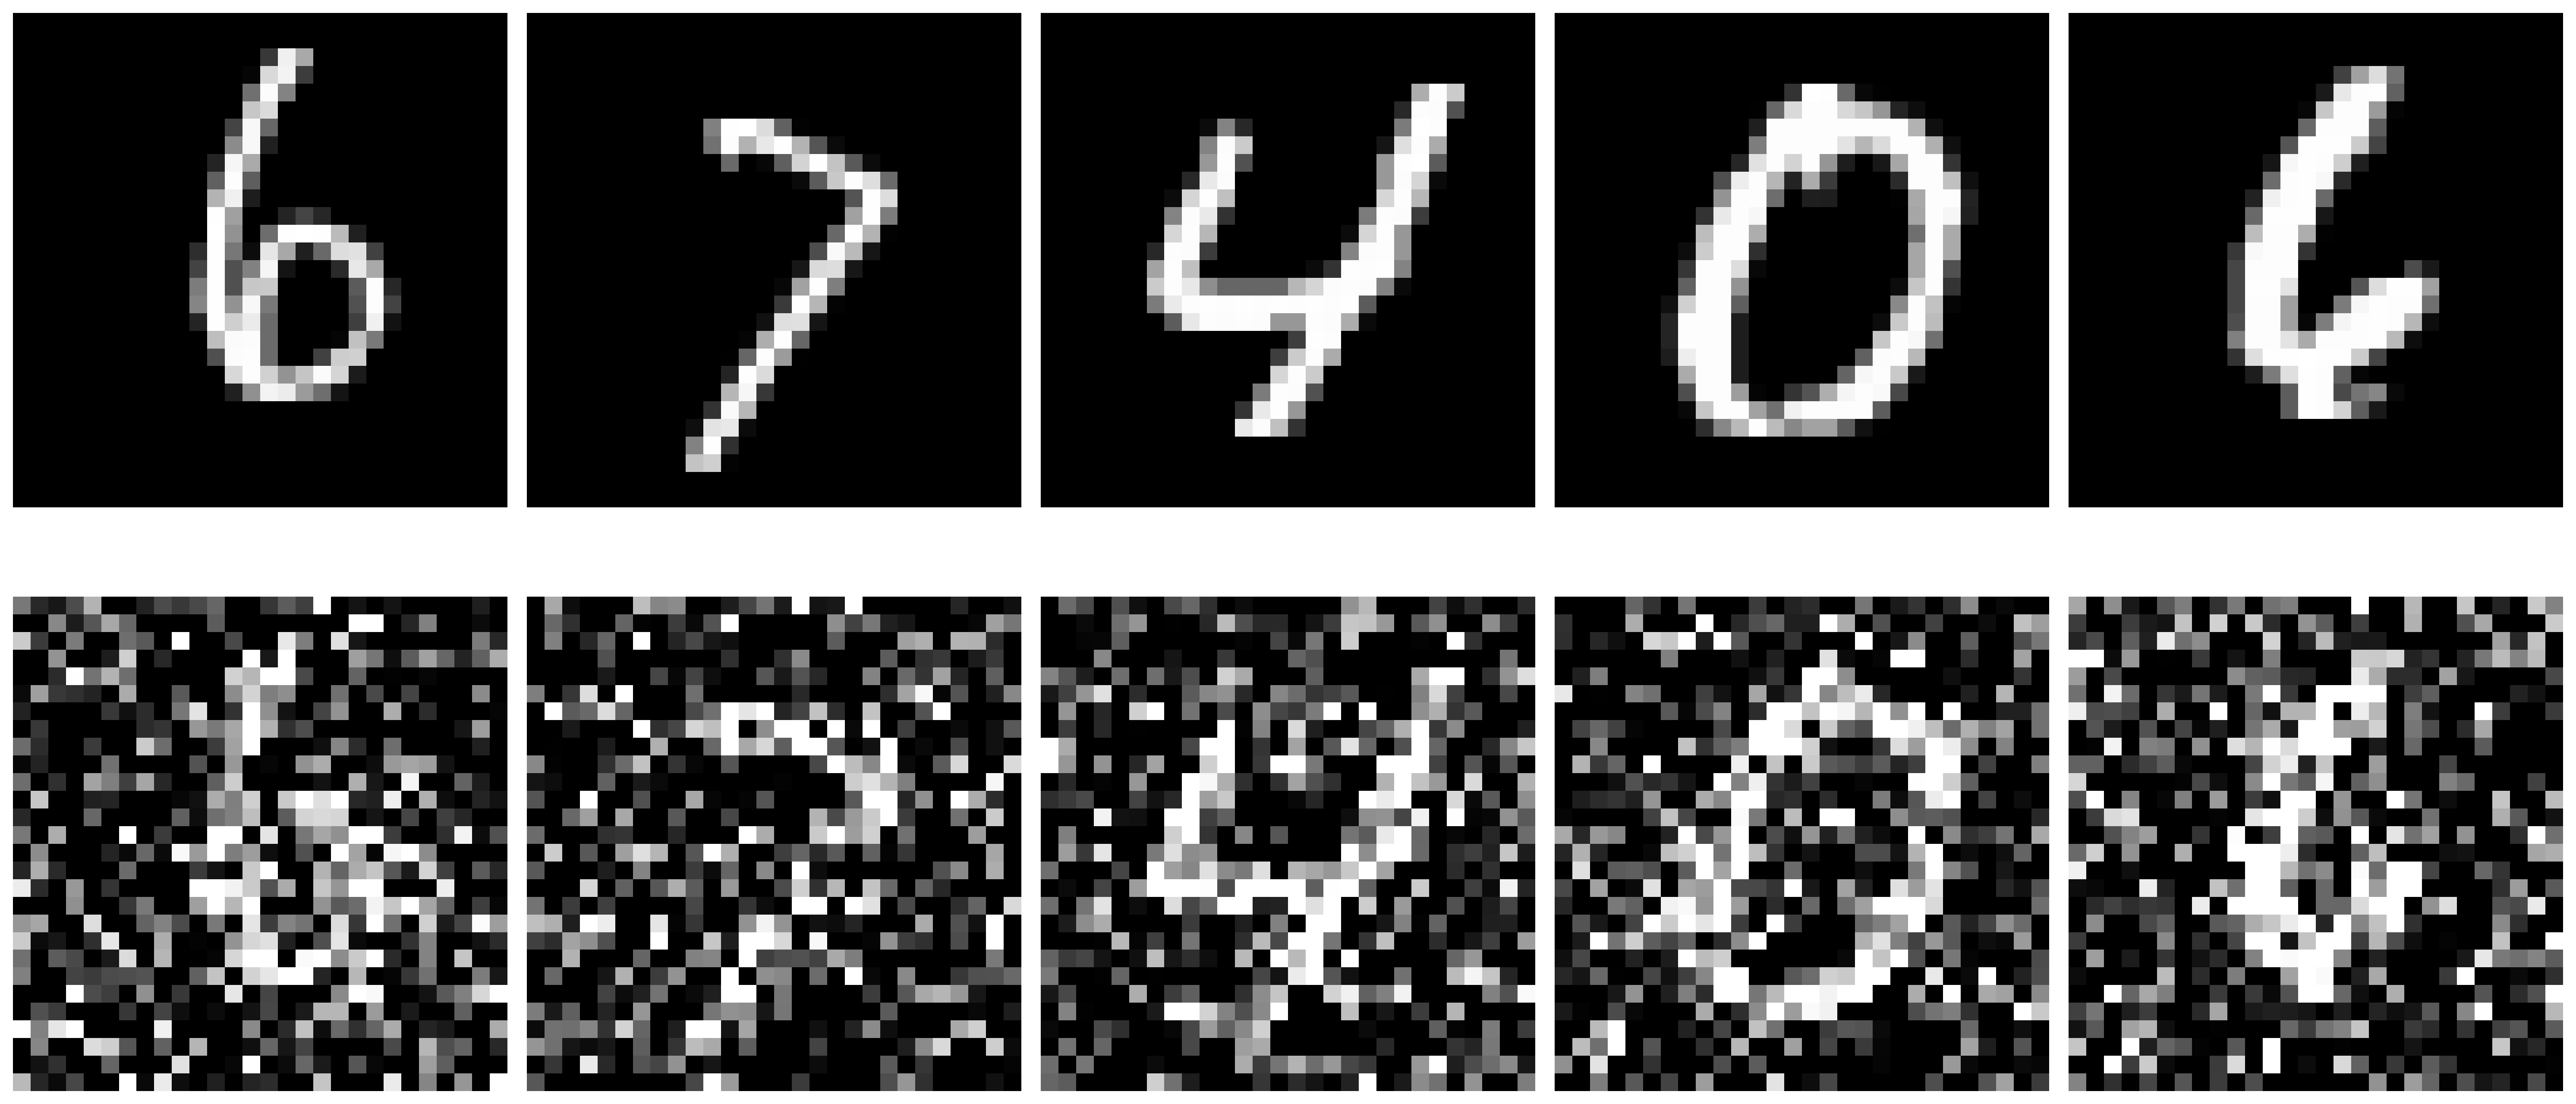

train_noisy.shape=(50000, 28, 28, 1)
train_clean.shape=(50000, 28, 28, 1)
val_noisy.shape=(10000, 28, 28, 1)
val_clean.shape=(10000, 28, 28, 1)
test_noisy.shape=(10000, 28, 28, 1)
test_clean.shape=(10000, 28, 28, 1)


In [3]:
tr_ae, vl_ae, te_ae = load_data()

train_clean = tr_ae[0]
val_clean = vl_ae[0]
test_clean = te_ae[0]

noise_factor = 0.5
# random values as noise source
train_noisy = train_clean + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_clean.shape)  
val_noisy = val_clean + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=val_clean.shape) 
test_noisy = test_clean + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_clean.shape) 

# to make values in the range of 0 to 1: values<0 -> 0 while values>1 -> 1.
train_noisy = np.clip(train_noisy, 0., 1.)   
val_noisy = np.clip(val_noisy, 0., 1.)
test_noisy = np.clip(test_noisy, 0., 1.)

idxs = np.random.choice(test_noisy.shape[0], 5)
plt.figure(figsize=(20, 10))
for i, idx in enumerate(idxs):
    plt.subplot(2, 5, i+1)
    plt.axis(False)
    plt.imshow(train_clean[idx,:,:], cmap='gray')
    plt.subplot(2, 5, i+6)
    plt.axis(False)
    plt.imshow(train_noisy[idx,:,:], cmap='gray')
plt.tight_layout()
plt.show()

print(f"{train_noisy.shape=}")
print(f"{train_clean.shape=}")
print(f"{val_noisy.shape=}")
print(f"{val_clean.shape=}")
print(f"{test_noisy.shape=}")
print(f"{test_clean.shape=}")

Create an autoencoder having three downsampling steps (encoder) and three upsamplig steps (decoder).

In this case, try to do it in the _functional_ approach, instead of adding layers with the `Sequential.add()` method. It is an alternative approach to create a Sequential network, but sometimes it is more convenient, it is more flexible.

Check https://www.tensorflow.org/guide/keras/functional_api#introduction

Thus:
1. create an input tensor using the `tf.keras.Input` class.
1. apply this input tensor to a Conv2D layer. It will return an output tensor. Store it in a variable.
1. apply this stored tensor to a MaxPooling2D layer and store the new returned tensor.
1. repeat 2. and 3. two times more (set an appropriated kernel size like in section 3)
2. apply a flatten layer (resulting to 144 linial neurons)
3. reshape it back to (3,3,16)
4. upsample the model using three steps (`Conv2DTranspose+UpSampling2D`), reducing the featuring maps just in an opposite way ($16\rightarrow8\rightarrow4$) while doubling the size of the images.

Finally, create the model with `tf.keras.Model` class, using the input tensor and the last returned tensor as arguments.

Compile the model (in this case you can use the `MSE` as loss function, why?) and call the summary to check the model shape.

Train the model for some epochs using the `fit()` method.

In this case, let's learn some 'advanced' features provided by tensorflow (optional):

 - Check the `shuffle` input parameter of the `fit` function and activate it. What it does? Why can be useful?

 - It is possible to add callbacks on the `fit` method. Callbacks are functions (or classes) that are called after every training epoch (even every step). In this case, try to add an [`EarlyStopping()`](https://keras.io/api/callbacks/early_stopping/) callback to finish the training when the loss is saturated for **three epochs** on the **validation dataset** with a **minimum threshold of $0.05$**, set also the `verbose=1` to monitor it behavior. To be sure that the early stopper is triggered, set a huge number of epochs on the fit arguments.

Plot also the progress via the history.

Remove the noise on the test dataset using the `predict()` method.

Make a subplot having three rows and 5 columns to show 5 different images. Show in the first row the clean image, the noisy in the second and, finally, the noise-removed image by the model in the third. $\rightarrow$ Copy/paste the one in the beginning of this section and adapt the code to allow a new row for the denoised image by the prediction.

*Check better results on [the original page](https://keras.io/examples/vision/autoencoder/)*.

## 5. Autoencoder for dimension reduction (unsupervised training)

Let's do a true autoencoder, where the input and the output are forced to be the same. It can seem stupid, but we will force passing all information of the image through a bottleneck, the embedding. Then, the model will learn to condensate all the information on an image to a few of numbers.

Let's set an embedding of just two neurons.

So, make an autoencoder, made of two independent models, the encoder and the decoder.

Firstly, create an encoder model having 3 `Conv2D+MaxPooling2D` layers, and a final `Flattened+Dense` layer resulting with just 2 neurons. Use the functional approach like in section 4.

Print the summary to check the encoder.

Secondly, create the decoder:
1. begin with a Dense layer of 144 neurons, applied to last returned tensor from the encoder
2. reshape it to (3, 3, 16)
3. add 3 upsamplig steps like in section 4.
4. create the model with `tf.keras.Model` using the last returned tensor of the encoder (used as first input in the decoder) and the last returned tensor of the decoder.
5. print the summary of the decoder

Thirdly, let's build the autoencoder just by creating a model with the very first tensor for the encoder (Input) and the very last for the decoder, and print the summary.

As the whole autoencoder is the only model to be trained, you should compile only the autoencoder. Set `MSE` as loss function.

Fit it with the images for 10 epochs and plot the history curves.

Generate fake digits by setting random numbers in the embedding vector: run (predict) the decoder model with random numbers and show the generated images. What you see? It is a number?

Make a grid of $9\times9$ subplots showing fake digits generated by increasing/decreasing the value of one or the other component of the embedding.

## 6. [Just read] Autoencoders for random face generator

Check the [`random_face_generator.ipynb` notebook](https://github.com/dhanushkamath/VariationalAutoencoder/blob/master/Variational_Autoencoder.ipynb), it is based on the same principle.